In [1]:
!pip install uncertainties

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import scipy as sp
import scipy.constants as spc
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
#from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def campo_magnetico_helmholtz(corrente, diametro, n_espiras):
  raio = diametro/2
  return 8*spc.mu_0*n_espiras*corrente/(raio*5*(5**0.5))

In [5]:
def e_m_fit_tensao_const(fit, tensao):
  raio_bobina = ufloat(0.395/2, 0.001)
  n_espiras = 154

  sup_frac = 5*(5**0.5)*raio_bobina*((2*tensao)**0.5)
  inf_frac = 8*n_espiras*spc.mu_0

  e_m = inf_frac*ufloat(fit.slope, fit.stderr)/sup_frac
  e_m = 1/(e_m**2)

  return e_m

In [9]:
def e_m_fit_corrente_const(fit, corrente):
  raio_bobina = ufloat(0.20, 0.001)
  n_espiras = 154

  sup_frac = (8*n_espiras*spc.mu_0*corrente)**2
  inf_frac = 2*(5*(5**0.5)*raio_bobina)**2

  e_m = inf_frac*ufloat(fit.slope, fit.stderr)/sup_frac

  return e_m

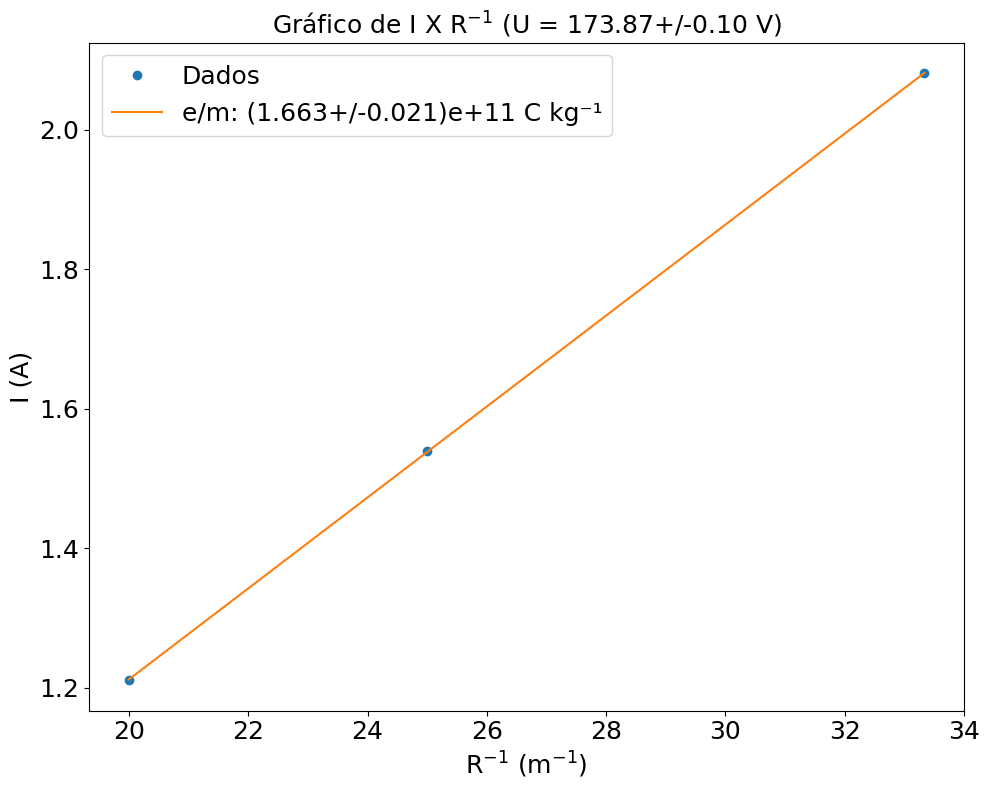

In [10]:
raio = np.array([0.03, 0.04, 0.05])
corrente = np.array([2.081,1.54,1.211])
tensao = np.array([173.8,173.9,173.9])

dados = pd.DataFrame({'raio': raio, 'corrente': corrente, 'tensao':tensao})

x = 1/dados['raio'].loc[dados['raio']!=0.02]
y = dados['corrente'].loc[dados['raio']!=0.02]

# como todos valores são iguais, não importa ser média ou o valor direto
tensao = ufloat(dados['tensao'].mean(), 0.1)

fit = linregress(x, y)
e_m = e_m_fit_tensao_const(fit, tensao)

x_lim = np.linspace(np.min(x), np.max(x))

plt.figure(figsize=(10,8))
plt.plot(x, y, 'o', label='Dados')
plt.plot(x_lim, fit.slope*x_lim + fit.intercept, '-', label=f'e/m: {e_m} C kg⁻¹')

plt.title('Gráfico de I X R$^{-1}$ (U = ' + str(tensao) + ' V)', fontsize=18)
plt.xlabel('R$^{-1}$ (m$^{-1}$)', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('I (A)', fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.tight_layout()

plt.show()

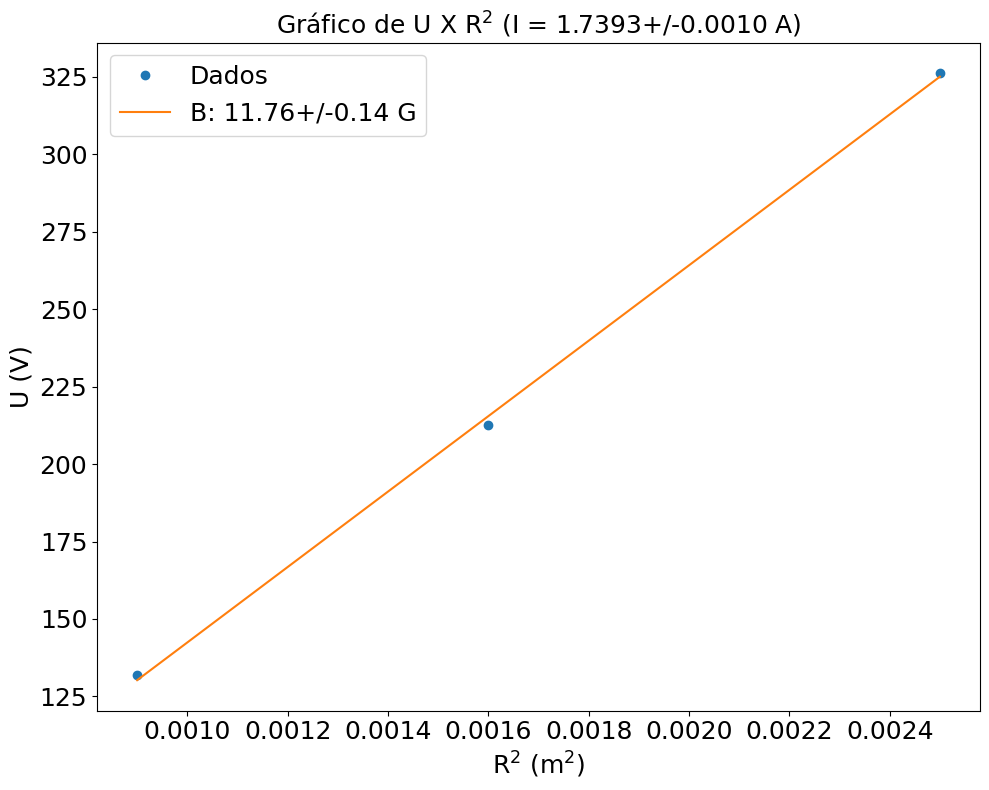

In [11]:
raio = np.array([0.03, 0.04, 0.05])
corrente = np.array([1.74,1.739,1.739])
tensao = np.array([131.8,212.7,326.2])

dados = pd.DataFrame({'raio': raio, 'corrente': corrente, 'tensao':tensao})

x = dados['raio']**2
y = dados['tensao']

# como todos valores são iguais, não importa ser média ou o valor direto
corrente = ufloat(dados['corrente'].mean(), 0.001)

fit = linregress(x, y)
campo_resultante_1 = 10_000*(2*ufloat(fit.slope, fit.stderr)/(spc.e/spc.m_e))**0.5

x_lim = np.linspace(np.min(x), np.max(x))

plt.figure(figsize=(10,8))
plt.plot(x, y, 'o', label='Dados')
plt.plot(x_lim, fit.slope*x_lim + fit.intercept, '-', label=f'B: {campo_resultante_1} G')

plt.title('Gráfico de U X R$^{2}$ (I = ' + str(corrente) + ' A)', fontsize=18)
plt.xlabel('R$^{2}$ (m$^{2}$)', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('U (V)', fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.tight_layout()

plt.show()

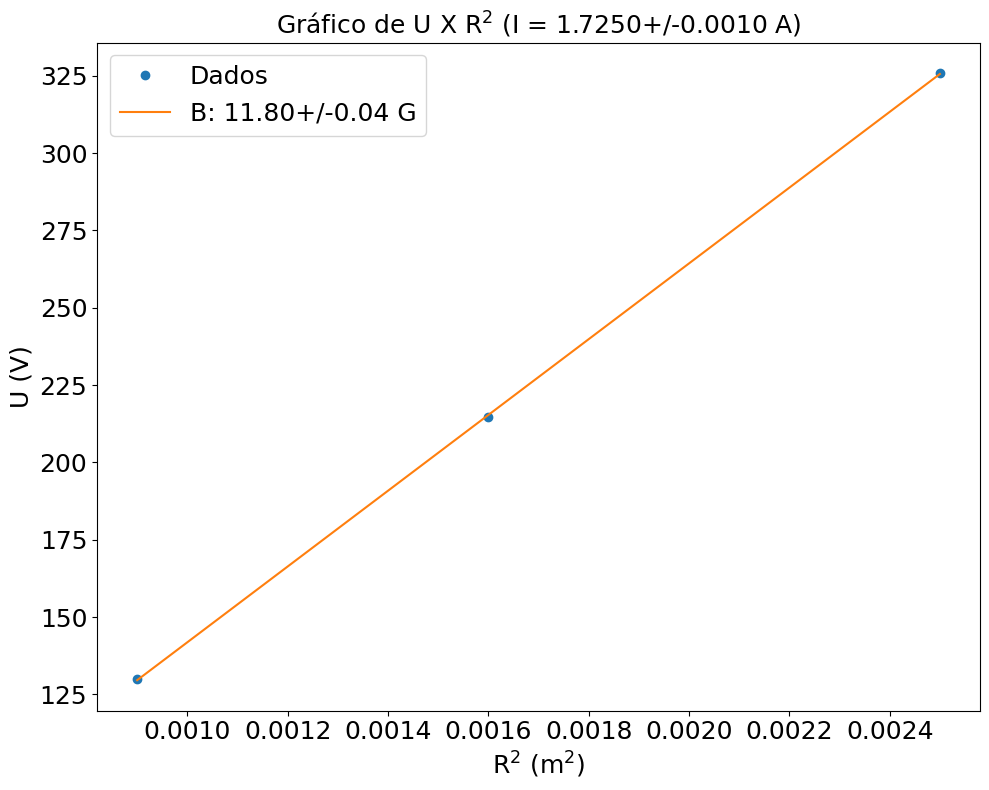

In [13]:
raio = np.array([0.03, 0.04, 0.05])
corrente = np.array([1.725,1.725,1.725])
tensao = np.array([130,214.6,325.9])

dados = pd.DataFrame({'raio': raio, 'corrente': corrente, 'tensao':tensao})

x = dados['raio']**2
y = dados['tensao']

# como todos valores são iguais, não importa ser média ou o valor direto
corrente = ufloat(dados['corrente'].mean(), 0.001)

fit = linregress(x, y)
campo_resultante_2 = 10_000*(2*ufloat(fit.slope, fit.stderr)/(spc.e/spc.m_e))**0.5

x_lim = np.linspace(np.min(x), np.max(x))

plt.figure(figsize=(10,8))
plt.plot(x, y, 'o', label='Dados')
plt.plot(x_lim, fit.slope*x_lim + fit.intercept, '-', label=f'B: {campo_resultante_2} G')

plt.title('Gráfico de U X R$^{2}$ (I = ' + str(corrente) + ' A)', fontsize=18)
plt.xlabel('R$^{2}$ (m$^{2}$)', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('U (V)', fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.tight_layout()

plt.show()

In [16]:
print(f'Campo magnético da Terra: {(campo_resultante_2-campo_resultante_1)/2}')

Campo magnético da Terra: 0.02+/-0.07
